In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import brute, differential_evolution

In [19]:
#dados retirados do https://covid.saude.gov.br/ em 26/06/2020, 6pm
ydata = np.array([1,1,1,2,2,2,2,3,7,13,19,25,25,34,52,77,98,121,200,234,291,428,621,904,1128,1546,1891,2201,2433,2915,3417,3904,4256,4579,5717,6836,7910,9056,10278,11130,12056,13717,15927,17857,19638,20727,22169,23430,25262,28320,30425,33682,36599,38654,40581,43079,45757,49492,52995,58509,61888,66501,71886,78162,85380,91299,96396,101147,107780,114715,125218,135106,145328,155939,162699,168331,177589,188974,202918,218223,233142,241080,254220,271628,291579,310087,330890,347398,363211,374898,391222, 411821, 438238, 465166, 498440, 514849, 526447, 555383, 584016, 614941, 645771, 672846, 691758, 707412, 739503, 772416, 802828, 828810, 850514, 867624, 888271, 923189, 955377, 978142, 1032913, 1067579, 1085038, 1106470,1145906,1188631,1228114])
t = np.arange(len(ydata))

In [20]:
#função para o sistema discretizado do modelo SIR
#x[0] = s0, x[1] = i0, x[2] = a0, x[3] = gamma, x[4] = alpha
def sir(x):
    l = len(t)
    M = 210147125
    sk    = x[0]
    ik    = x[1]
    ak    = x[2]
    gamma = x[3]
    alpha = x[4]
    am = []
    for i in range(0,l):
        # sistema
        sk1 = -(gamma * (sk / M) * ik) + sk
        ik1 =  (gamma * (sk / M) * ik)-(alpha * ik) + ik
        ak1 =  (gamma * (sk / M) * ik) + ak
        # updates
        am.append(ak)
        sk = sk1
        ik = ik1
        ak = ak1
    return np.array(am)

In [21]:
#erro quadrático
def mse(y, yhat):
    return np.sqrt( np.power(y - yhat, 2).mean() )
    
#função a ser otimizada pelo scipy.optimize.differential_evolution
def func1(x):
    return mse(ydata, sir(x))

In [22]:
#intervalos para os parâmetros iniciais s0, i0, a0, gamma e alpha respectivamente
xslice = (
    (1.8E8, 2.1E8),
    (1, 800),
    (1, 800),
    (0.01, 0.9),
    (0.01, 0.9)
 )

In [31]:
r1 = differential_evolution(func1, xslice)
r1.x

array([1.82647490e+08, 5.04179369e+02, 8.05788623e+00, 8.95648172e-01,
       7.35625790e-01])

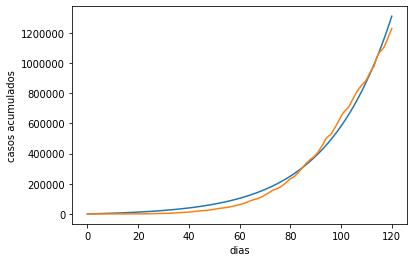

In [24]:
#gráfico da curva pelo differential_evolution e os dados
plt.plot(t, sir(r1.x), t, ydata)
plt.xlabel('dias')
plt.ylabel('casos acumulados')
plt.show()

In [25]:
tf = np.arange(320)
def sir_fut(tf,x):
    l = len(tf)
    M = 210147125
    sk    = x[0]
    ik    = x[1]
    ak    = x[2]
    gamma = x[3]
    alpha = x[4]
    am = []
    for i in range(0,l):
        # sistema
        sk1 = -(gamma * (sk / M) * ik) + sk
        ik1 =  (gamma * (sk / M) * ik)-(alpha * ik) + ik
        ak1 =  (gamma * (sk / M) * ik) + ak
        # updates
        am.append(ak)
        sk = sk1
        ik = ik1
        ak = ak1
    return np.array(am)

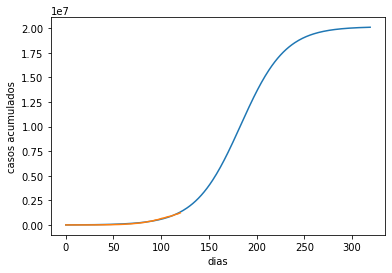

In [26]:
plt.plot(tf, sir_fut(tf,r1.x), t, ydata)
plt.xlabel('dias')
plt.ylabel('casos acumulados')
plt.show()

In [27]:
#xslice1 = (
#    slice(1.8E8, 2.1E8, 0.05E8),
#    slice(100, 800, 50),
#    slice(100, 800, 50),
#    slice(0.1, 0.6, 0.05),
#    slice(0.1, 0.6, 0.05),)
#r2 = brute(func1, xslice1, finish=None)
#r2

In [28]:
#calculo dos erros quadráticos de ambos do métodos
m = mse(ydata,sir(r1.x))
m
#n = mse(ydata,sir(r2))
#n

31918.723230037685